SABR model:
$$
\begin{aligned}
    &dF_t = \alpha_t F_t^{\beta} dW_t\\
    &d\alpha_t = v \alpha_t dZ_t\\
    dW_t dZ_t = \rho dt
\end{aligned}
$$

Let us introduce parameters:
$$
\begin{aligned}
&F_m = \sqrt{F K}\\
&\zeta = \dfrac{v}{\alpha}F_m^{1-\beta}\log \dfrac{F}{K}\\
&X(\zeta, \rho) = \log \dfrac{\sqrt{1 - 2 \zeta \rho + \zeta^2} + \zeta - \rho}{1-\rho}\\
&q_1 = \dfrac{(\beta-1)^2 \alpha^2 F_m^{2\beta - 2}}{24}\\
&q_2 = \dfrac{\rho \beta \alpha v F_m^{\beta - 1}}{4}\\
&q_3 = \dfrac{2-3\rho^2}{24}v^2\\
&S = 1 + T(q_1 + q_2 + q_3)\\
&D = F_m^{1-\beta}\left[ 1 + \dfrac{(\beta-1)^2}{24} \log^2 \dfrac{F}{K} + \dfrac{(\beta-1)^4}{1920}\log^4 \dfrac{F}{K}\right]\\
\end{aligned}
$$
$$
\sigma = \dfrac{\alpha S}{D} \times \dfrac{\zeta}{X(\zeta, \rho)}
$$

In [1]:
from sabr import SABR
from sabr_calibration import SABRCalibrator

from heston import Heston
from heston_calibration import HestonCalibrator

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sabr_approx import sabr_approx, sabr_approx_derivatives

## SABR calibration example

In [3]:
#sabr model parameters
sig0 = 0.2
alpha = 0.9
beta = 0.9
rho = -0.5

sabr_params_0 = np.asarray([sig0, alpha, beta, rho])

#market params
r = 0
F = 4.0
T = 1.123

#strikes
Kn = F * np.linspace(0.5, 2.6, 32)

In [4]:
#sabr model
sabr_0 = SABR(sabr_params_0, r)

In [5]:
c0, iv0 = sabr_0( Kn, F, T )

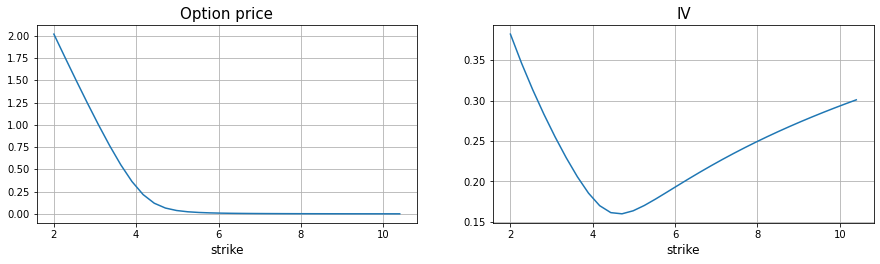

In [6]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, c0)
ax1.grid()
ax1.set_title("Option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, iv0)
ax2.grid()
ax2.set_title("IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration:

In [7]:
#sabr calibrator object
sabr_calib = SABRCalibrator(r)

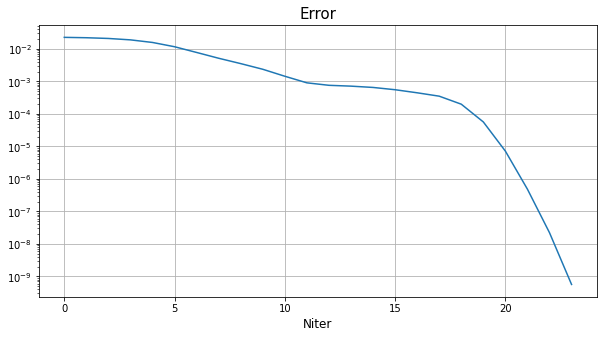

In [8]:
#calibrate sabr model
fs = sabr_calib.fit_iv(iv0, Kn, F, T)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [9]:
print("real params:", sabr_params_0)
print("calib params:", sabr_calib.sabr_params)

real params: [ 0.2  0.9  0.9 -0.5]
calib params: [ 0.2         0.9         0.89999999 -0.5       ]


In [10]:
#predict option prices
c1, iv1 = sabr_calib.predict(Kn, F, T )

In [11]:
c1 - c0

array([ 2.71507261e-11,  1.93463023e-11,  6.07025541e-12, -1.33733025e-11,
       -3.86730648e-11, -6.69664324e-11, -9.00435282e-11, -9.19793131e-11,
       -5.79538639e-11, -4.24016378e-12,  2.92431634e-11,  3.58499341e-11,
        3.08484349e-11,  2.37550257e-11,  1.75642556e-11,  1.27633737e-11,
        9.16931808e-12,  6.49763576e-12,  4.50450788e-12,  3.00581088e-12,
        1.86907434e-12,  9.98978678e-13,  3.27626815e-13, -1.93931676e-13,
       -6.01720063e-13, -9.21828586e-13, -1.17414065e-12, -1.37332160e-12,
       -1.53062632e-12, -1.65471283e-12, -1.75218520e-12, -1.82836905e-12])

In [12]:
iv1 - iv0

array([ 1.00259023e-10,  5.07904829e-11,  1.15936705e-11, -1.89824267e-11,
       -4.17436086e-11, -5.66034997e-11, -6.22631668e-11, -5.58657010e-11,
       -3.45980744e-11, -2.87464497e-12,  2.54418708e-11,  4.23968916e-11,
        4.99081332e-11,  5.17049736e-11,  5.02310693e-11,  4.68234618e-11,
        4.22109847e-11,  3.68083619e-11,  3.08660042e-11,  2.45430343e-11,
        1.79468107e-11,  1.11504972e-11,  4.20816160e-12, -2.84011703e-12,
       -9.96425165e-12, -1.71407333e-11, -2.43510212e-11, -3.15809601e-11,
       -3.88179489e-11, -4.60528282e-11, -5.32763278e-11, -6.04842287e-11])

In [23]:
#heston parameters
v_0 = 0.01
theta = 0.02
rho = -0.5
k = 2.0
sigma = 0.23

heston_params = np.asarray([v_0, theta, rho, k, sigma])

In [24]:
#heston model object
heston = Heston(heston_params, r)

In [25]:
#heston option price and iv
ch, ivh = heston(Kn, F, T)

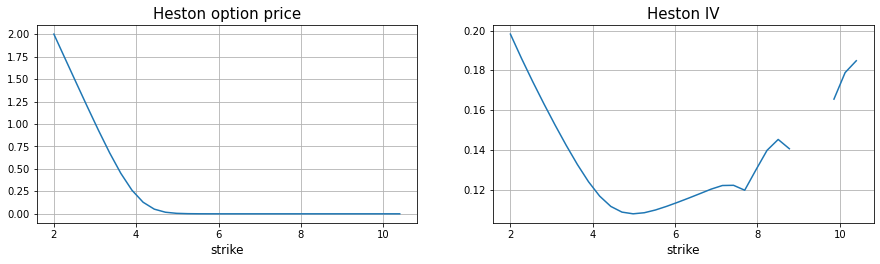

In [26]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch)
ax1.grid()
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh)
ax2.grid()
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration to heston data

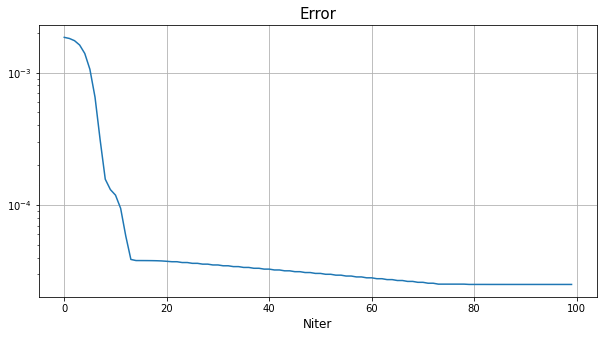

In [27]:
#calibrating sabr to heston
fs = sabr_calib.fit_price(ch, Kn, F, T, True)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [28]:
#predicting 
c1, iv1 = sabr_calib.predict(Kn, F, T )

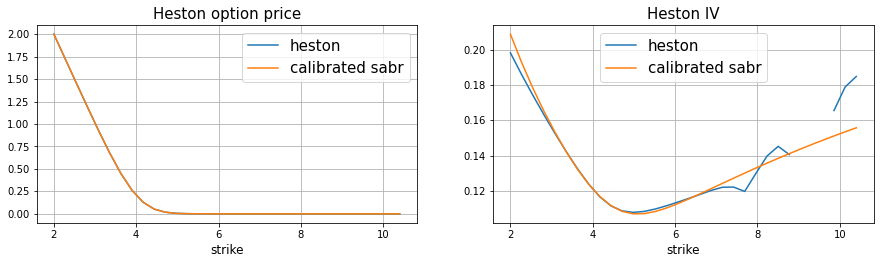

In [29]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch, label='heston')
ax1.plot(Kn, c1, label='calibrated sabr')
ax1.grid()
ax1.legend(fontsize=15)
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh, label='heston')
ax2.plot(Kn, iv1, label='calibrated sabr')
ax2.grid()
ax2.legend(fontsize=15)
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

In [30]:
err_c = np.linalg.norm(c1 - ch) / np.linalg.norm(ch) * 100
err_iv = np.linalg.norm(iv1 - ivh) / np.linalg.norm(ivh) * 100

In [31]:
print(f"error in option price = {err_c:.4f}%,\nerror in iv = {err_iv:.4f}%")

error in option price = 0.0231%,
error in iv = nan%
